# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('treated_demo01.csv', sep=',')
df

,sexo,posse_de_veiculo,posse_de_imovel,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,status_emprego,qtd_filhos_1,...,tempo_emprego_1-3 anos,tempo_emprego_3-5 anos,tempo_emprego_5-10 anos,tempo_emprego_10-20 anos,tempo_emprego_20-30 anos,tempo_emprego_30+ anos,qt_pessoas_residencia_2,qt_pessoas_residencia_3,qt_pessoas_residencia_4,qt_pessoas_residencia_5+
0,1,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0,0,1,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
6766,0,0,1,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
6767,0,0,1,1,1,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
6768,1,1,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
X = df.drop('mau', axis=1)
y = df[['mau']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

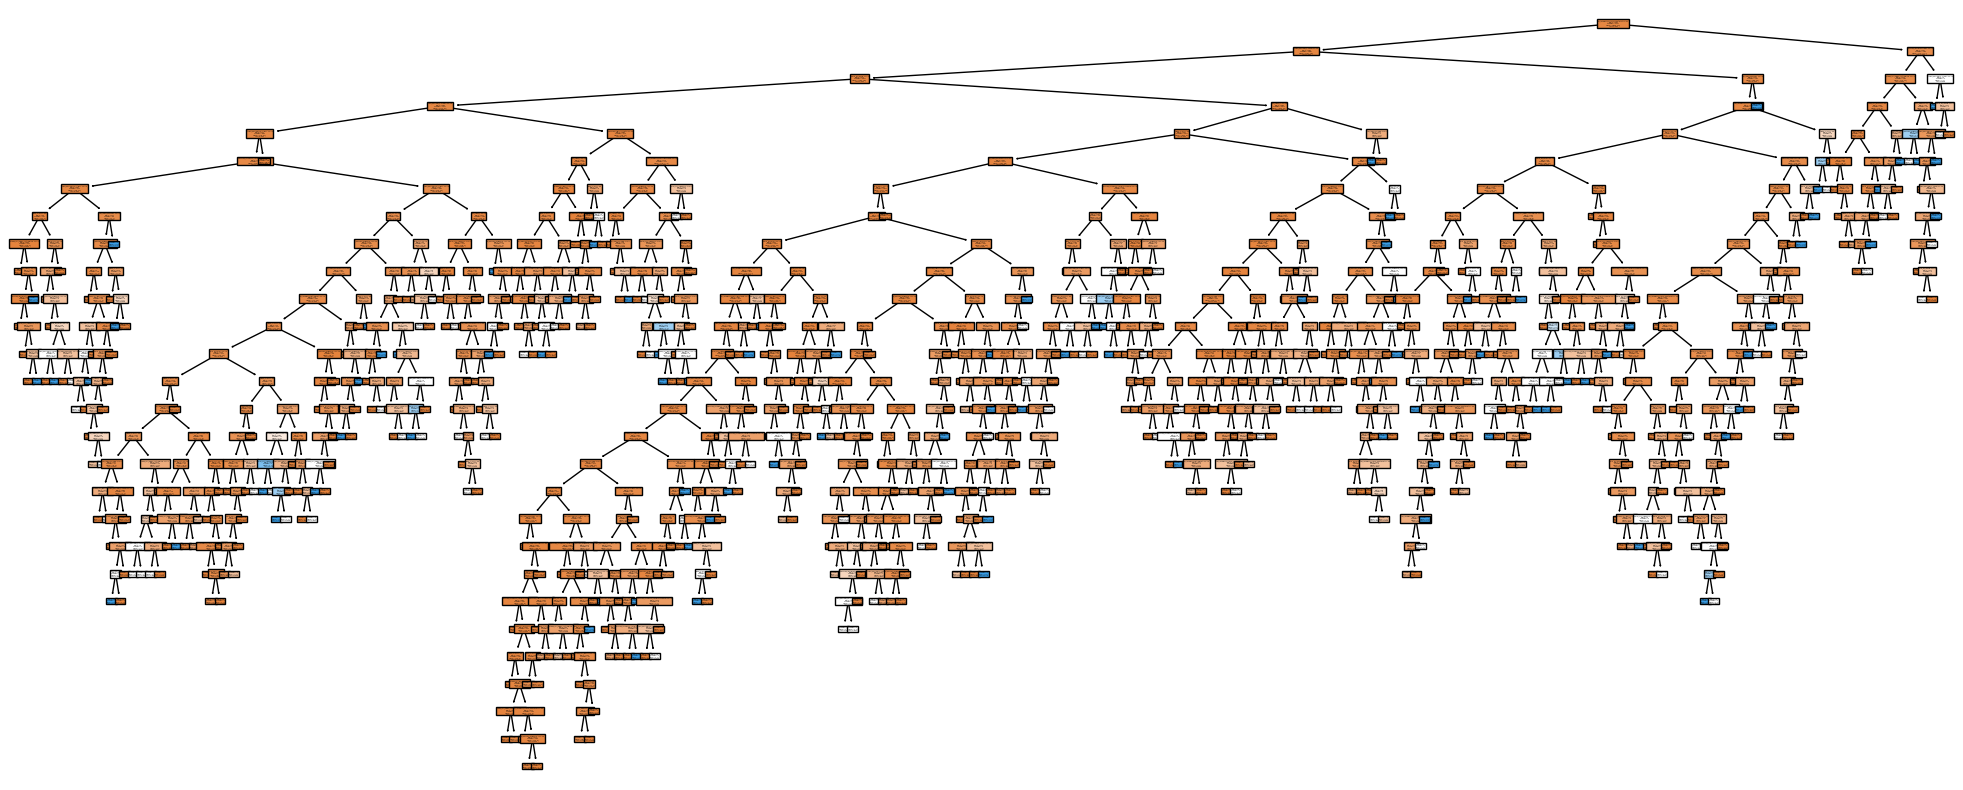

In [7]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

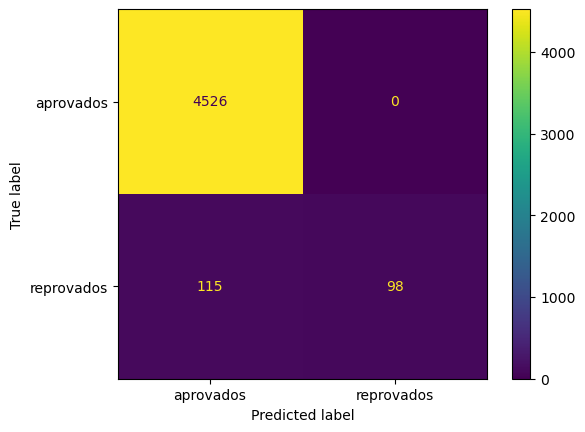

In [32]:
cm = confusion_matrix(y_train, clf.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot();

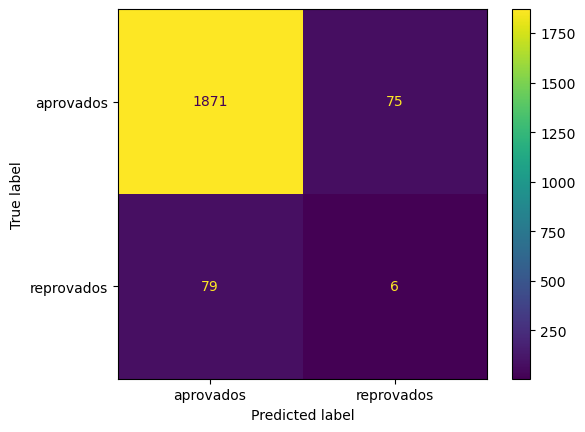

In [33]:
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot();

In [30]:
print('Acurácia treino:', accuracy_score(y_train, clf.predict(X_train)))
print('Acurácia teste:', accuracy_score(y_test, clf.predict(X_test)))

Acurácia treino: 0.9757332770626714
Acurácia teste: 0.9241752831117676


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [34]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

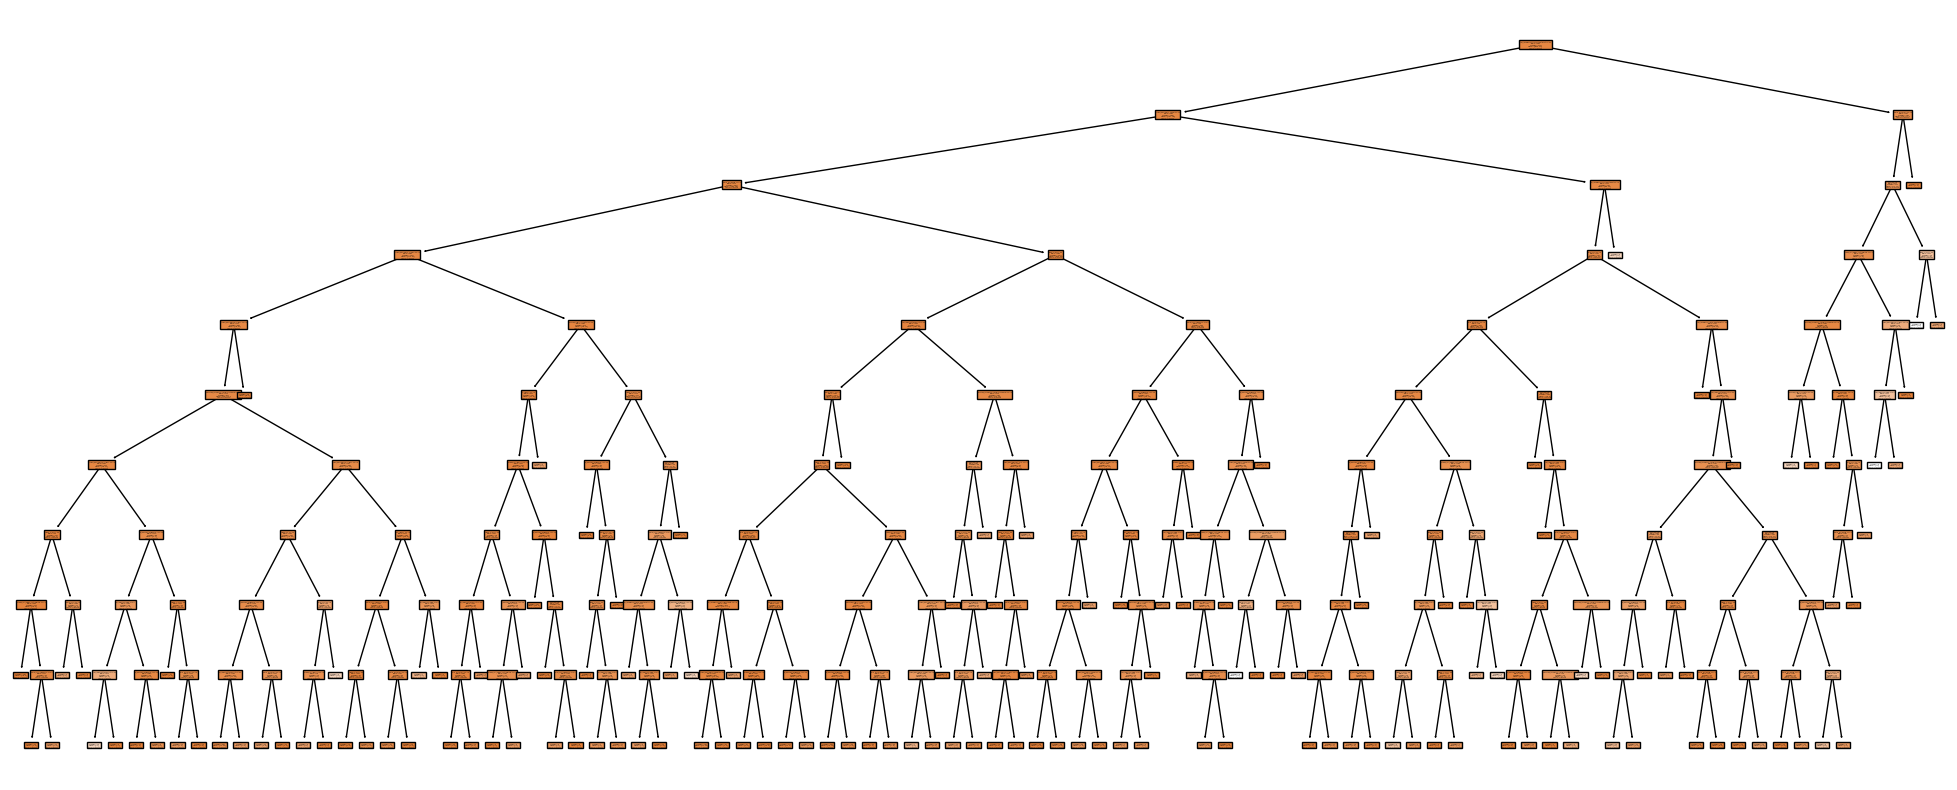

In [38]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

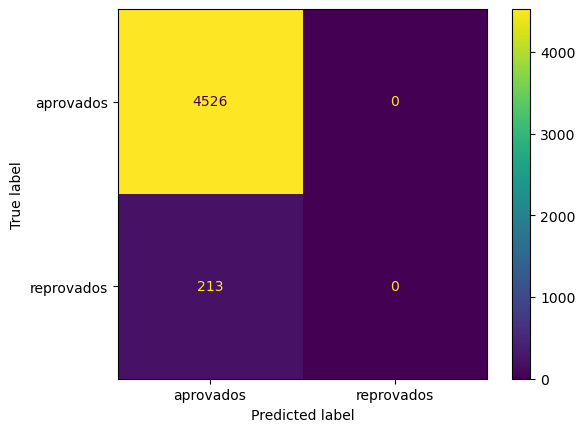

In [35]:
cm = confusion_matrix(y_train, clf.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot();

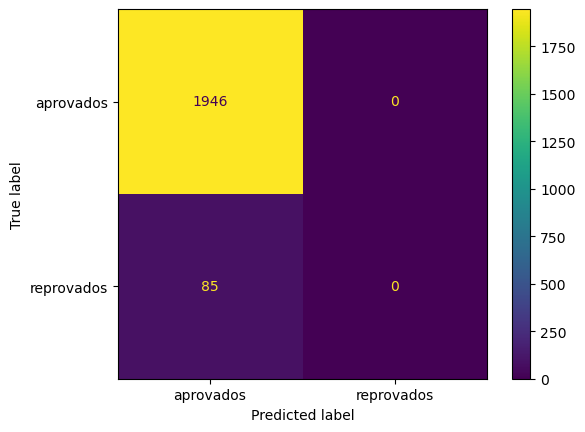

In [36]:
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot();

In [37]:
print('Acurácia treino:', accuracy_score(y_train, clf.predict(X_train)))
print('Acurácia teste:', accuracy_score(y_test, clf.predict(X_test)))

Acurácia treino: 0.9550538088204262
Acurácia teste: 0.9581486952240276
